## Problem 2: Points to map (7 points)
 
In this task, we continue to learn how to create geometries from latitude and longitude coordinates.

**Our aim is to plot a map of points, based on a set of longitude and latitude coordinates that are stored in a csv file.** 

The input data is stored in the CSV spreadsheet `some_posts.csv` in the directory `data`. The coordinates stored there are in WGS84 format (decimal degrees, EPSG:4326), and the first few rows of data look like this:
 
```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of de-identified social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | unique id for each user|

*Note: Although the data is based on real social media data, the userids and timestamps have been randomized making it impossible to link the data to the original posts.*

### a) Read the CSV file

- Read the data from `some_posts.csv` into a Pandas dataframe called `data`

In [142]:
# ADD YOUR OWN CODE HERE
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt
import pathlib

In [100]:
DATA_DIRECTORY = pathlib.Path().resolve() / "data"

In [128]:
DATA_DIRECTORY

PosixPath('/home/jordan/Documents/AutoGIS/Exercises/Exercise_2/data')

In [109]:
data = pd.read_csv(DATA_DIRECTORY / "some_posts.csv", sep=",")

In [110]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the result
print(f"Number of rows: {len(data)}")

Number of rows: 81379


### b) Add a geometry column and fill it with geometries

- Create an empty column called `geometry` where you will store shapely Point objects
- Insert Point objects into the column `geometry` based on the coordinate columns 

You want to create a `shapely.geometry.Point` *for each row*, based on the columns `lon` and `lat`.
There are different approaches to this task, we encourage you to try to use the [`apply()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) of the data frame, together with a *lambda function* (see the [**hints  for exercise 1**](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-1/exercise-1.html), and the [**hints for this exercise**](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-2/exercise-2.html))


In [117]:
# ADD YOUR OWN CODE HERE
get_points = lambda a: Point(a)
data["geometry"] = data.loc[:, ["lon", "lat"]].apply(get_points, axis=1)

/home/jordan/anaconda3/envs/autogis/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [118]:
data

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.484633302 -24.980792492)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.508905612 -25.499224667)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.930866066 -24.342578456)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.519718439 -24.85461393)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.520835558 -24.921068894)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (31.354468659 -24.79954083)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (30.956033333 -25.467991667)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (30.997408647 -25.332223289)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (31.00553607 -25.508851029)


In [119]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the result
print(data['geometry'].head())

0    POINT (31.484633302 -24.980792492)
1    POINT (31.508905612 -25.499224667)
2    POINT (30.930866066 -24.342578456)
3     POINT (31.519718439 -24.85461393)
4    POINT (31.520835558 -24.921068894)
Name: geometry, dtype: object


### c) Convert the `pandas.DataFrame` into a `geopandas.GeoDataFrame`

- Convert `data` into a `geopandas.GeoDataFrame` using its [constructor](https://geopandas.org/reference/geopandas.GeoDataFrame.html). (*See [the hints for this exercise](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-2/exercise-2.html) for additional instructions*)
- Make sure that the resulting `GeoDataFrame` has a coordinate reference system defined

In [130]:
# ADD YOUR OWN CODE HERE
data = gpd.GeoDataFrame(data, crs="EPSG:4326")

In [131]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
data

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (31.35447 -24.79954)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (30.95603 -25.46799)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (30.99741 -25.33222)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (31.00554 -25.50885)


### d) Save the data in Shapefile format as `kruger_points.shp` inside the `data` directory

In [129]:
# ADD YOUR OWN CODE HERE
data.to_file(DATA_DIRECTORY/ "kruger_points.shp")

In [126]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check that the output file exists
import pathlib
assert pathlib.Path(DATA_DIRECTORY / "kruger_points.shp").exists()

### e) Create a simple map of the points

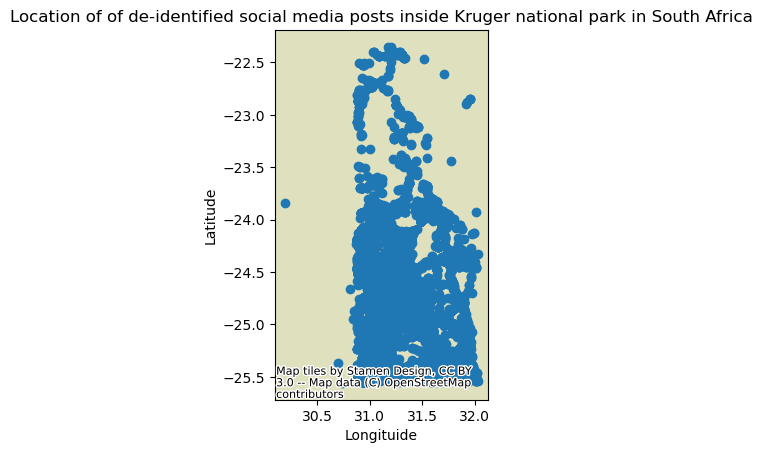

In [145]:
# ADD YOUR OWN CODE HERE
ax = data.plot()
plt.title("Location of of de-identified social media posts inside Kruger national park in South Africa")
plt.xlabel("Longituide")
plt.ylabel("Latitude")
cx.add_basemap(ax, zoom=18)


### *Optional:* Download the output shapefile and create a map using a Desktop GIS

For example, overlay the points with a basemap. Post the resulting map in the `#week2` slack channel.


---

### Great job!

You can move on to [Exercise-2-problem-3.ipynb](Exercise-2-problem-3.ipynb).